In [1]:
# Import packages
from natsort import natsorted
import glob

%matplotlib inline

In [2]:
# Mount Google Drive (where files can be found)
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Import code utilities files
import sys
sys.path.insert(0,'/content/drive/My Drive/IAAI_2022_Final_Code_Data_Public')
import exp_utils_clean
import satellite_data_cleaning_utils_clean

Please first run generate-predictor-rasters.ipynb to gather satellite data and labels, if you haven't already.

# Prepare Satellite Data

In [4]:
# Provide inputs (from generate_predictor_rasters.ipynb)
outPath = '/content/drive/My Drive/TEST/intermediate/'
labPath = '/content/drive/My Drive/TEST/'
fullImList = natsorted(glob.glob('/content/drive/My Drive/TEST/final_imgs/*.tif'))

Create the following folders in outPath (all_rasters_norm, final_imgs_imputed_domain, final_imgs_feature_selection_zeros, final_imgs_feature_selection_kmedoids_center, final_imgs_feature_selection_center if runExpert), then run the below cell to write out intermediate files.

In [ ]:
# Gather data
expertCenters = [46,54,41,40,48,57,39,63,53,2,0,1,5,8,6,13,26,18,25,38]
satellite_data_cleaning_utils_clean.run_satellite_cleaning(fullImList, outPath, [labPath+'Fe', labPath+'B12', labPath+'A'], runExpert=['/content/drive/My Drive/Colab Notebooks/mnd/Categories for Food sorted2.csv', expertCenters])

/content/drive/My Drive/IAAI_2022_Final_Code_Data_Public/satellite_data_cleaning_utils_clean.py:66: RuntimeWarning: All-NaN slice encountered
  minInBands[i, band] = np.nanmin(imdata[:,:,band])
/content/drive/My Drive/IAAI_2022_Final_Code_Data_Public/satellite_data_cleaning_utils_clean.py:67: RuntimeWarning: All-NaN slice encountered
  maxInBands[i, band] = np.nanmax(imdata[:,:,band])
/content/drive/My Drive/IAAI_2022_Final_Code_Data_Public/satellite_data_cleaning_utils_clean.py:94: RuntimeWarning: invalid value encountered in true_divide
  (maximumBands[band]- minimumBands[band])


image index 0
imputation needed for im  0
[ 7  8 14 32 33 34 44 48 50 53 54 55 61 63 67 68 69 71 75 76 79 81 89]
band:  7
setting to 0
band:  8
no data
band:  14
setting to 0
band:  32
no data
band:  33
no data
band:  34
no data
band:  44
no data
band:  48
no data
band:  50
no data
band:  53
no data
band:  54
no data
band:  55
no data
band:  61
no data
band:  63
no data
band:  67
no data
band:  68
no data
band:  69
no data
band:  71
no data
band:  75
no data
band:  76
no data
band:  79
no data
band:  81
no data
band:  89
no data
image index 1
imputation needed for im  1
[ 0  1  2  3  4  7  8 14 18 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89]
band:  0
setting to 0
band:  1
setting to 0
band:  2
setting to 0
band:  3
setting to 0
band:  4
setting to 0
band:  7
setting to 0
band:  8
no data
band:  14
setting to 0
band:  18

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Iron: ['AF_Cattle1km_AD_2010_v2_1', 'AF_Chickens1km_AD_2010_v2_01', 'AF_Goats1km_AD_2010_v2_1', 'AF_Pigs1km_AD_2010_GLW2_01', 'AF_Sheep1km_AD_2010_v2_1', 'GFSAD30AFCE_2015_S30E40_001_2017261090100_landcover', 'img_elevation_0_22_elevation', 'img_fire_0_22_T21', 'img_fishing_0_22_sum', 'img_forest-binary_0_22_fnf', 'img_forest-change_0_22_lossyear', 'img_health_7-5km_0_22_health_7-5km', 'img_health_17-5km_0_22_health_17-5km', 'img_landcover_0_22_discrete_classification', 'img_landcover_0_22_forest_type', 'img_mkt_3-75km_0_22_mkt_3-75km', 'img_mkt_7-5km_0_22_mkt_7-5km', 'img_nighttime_0_22_avg_rad', 'img_population_0_22_population_density', 'img_water_0_22_detections', 'img_weather_0_22_Evap_tavg', 'img_weather_0_22_LWdown_f_tavg', 'img_weather_0_22_Lwnet_tavg', 'img_weather_0_22_Psurf_f_tavg', 'img_weather_0_22_Qair_f_tavg', 'img_weather_0_22_Qg_tavg', 'img_weather_0_22_Qh_tavg', 'img_weather_0_22_Qle_tavg', 'img_weather_0_22_Qs_tavg', 'img_weather_0_22_Qsb_tavg', 'img_weather_0_22_RadT

# Train Models and Evaluate

In [4]:
# Provide inputs
csvs = natsorted(glob.glob('/content/drive/My Drive/TEST/intermediate/*.csv'))
method = [v.split('_')[0].split('/')[-1] for v in csvs]
regions = [v.split('_')[-1].split('.')[0] for v in csvs]
mnds = [v.split('_')[-2] for v in csvs]
csvs_metadata = [[mnds[i], regions[i], method[i]] for i in range(len(csvs))]

In [6]:
#@title
orig = \
['AF_Cattle1km_AD_2010_v2_1', 
'AF_Chickens1km_AD_2010_v2_01',
'AF_Goats1km_AD_2010_v2_1',
'AF_Pigs1km_AD_2010_GLW2_01',
'AF_Sheep1km_AD_2010_v2_1',
'GFSAD30AFCE_2015_S30E40_001_2017261090100_landcover',
'img_elevation_0_22_elevation',
'img_fire_0_22_T21',
'img_forest-binary_0_22_fnf',
'img_forest-change_0_22_lossyear',
'img_landcover_0_22_discrete_classification',
'img_landcover_0_22_forest_type',
'img_nighttime_0_22_avg_rad',
'img_population_0_22_population_density',
'img_water_0_22_detections',
'img_weather_0_22_Evap_tavg',
'img_weather_0_22_LWdown_f_tavg',
'img_weather_0_22_Lwnet_tavg',
'img_weather_0_22_Psurf_f_tavg',
'img_weather_0_22_Qair_f_tavg',
'img_weather_0_22_Qg_tavg',
'img_weather_0_22_Qh_tavg',
'img_weather_0_22_Qle_tavg',
'img_weather_0_22_Qs_tavg',
'img_weather_0_22_Qsb_tavg',
'img_weather_0_22_RadT_tavg',
'img_weather_0_22_Rainf_f_tavg',
'img_weather_0_22_SoilMoi00_10cm_tavg',
'img_weather_0_22_SoilMoi10_40cm_tavg',
'img_weather_0_22_SoilMoi40_100cm_tavg',
'img_weather_0_22_SoilMoi100_200cm_tavg',
'img_weather_0_22_SoilTemp00_10cm_tavg',
'img_weather_0_22_SoilTemp10_40cm_tavg',
'img_weather_0_22_SoilTemp40_100cm_tavg',
'img_weather_0_22_SoilTemp100_200cm_tavg',
'img_weather_0_22_SWdown_f_tavg',
'img_weather_0_22_Swnet_tavg',
'img_weather_0_22_Tair_f_tavg',
'img_weather_0_22_Wind_f_tavg',
'spam2017V2r1_SSA_Y_BANA_A',
'spam2017V2r1_SSA_Y_BEAN_A',
'spam2017V2r1_SSA_Y_CASS_A',
'spam2017V2r1_SSA_Y_COTT_A',
'spam2017V2r1_SSA_Y_COWP_A',
'spam2017V2r1_SSA_Y_GROU_A',
'spam2017V2r1_SSA_Y_LENT_A',
'spam2017V2r1_SSA_Y_MAIZ_A',
'spam2017V2r1_SSA_Y_OFIB_A',
'spam2017V2r1_SSA_Y_OOIL_A',
'spam2017V2r1_SSA_Y_OPUL_A',
'spam2017V2r1_SSA_Y_ORTS_A',
'spam2017V2r1_SSA_Y_POTA_A',
'spam2017V2r1_SSA_Y_RCOF_A',
'spam2017V2r1_SSA_Y_REST_A',
'spam2017V2r1_SSA_Y_RICE_A',
'spam2017V2r1_SSA_Y_SORG_A',
'spam2017V2r1_SSA_Y_SOYB_A',
'spam2017V2r1_SSA_Y_SUGC_A',
'spam2017V2r1_SSA_Y_SWPO_A',
'spam2017V2r1_SSA_Y_TEAS_A',
'spam2017V2r1_SSA_Y_TEMF_A',
'spam2017V2r1_SSA_Y_TOBA_A',
'spam2017V2r1_SSA_Y_TROF_A',
'spam2017V2r1_SSA_Y_VEGE_A',
'spam2017V2r1_SSA_Y_WHEA_A',
'img_mkt_3-75km_0_22_mkt_3-75km',
'img_mkt_7-5km_0_22_mkt_7-5km',
'img_health_7-5km_0_22_health_7-5km',
'img_health_17-5km_0_22_health_17-5km']

explained = ['Cattle',
'Chickens',
'Goats',
'Pigs',
'Sheep',
'Crop cover',
'Elevation',
'Fire',
'Forest',
'Deforest yr',
'Landcover',
'Forest type',
'Nighttime lights',
'Population',
'Water',
'Evapotranspiration',
'Downward longwave flux',
'Net longwave flux',
'Surface pressure',
'Specific humidity',
'Soil heat flux',
'Sensible heat flux',
'Latent heat flux',
'Storm surface runoff',
'Groundwater runoff',
'Surface temperature',
'Precipitation rate',
'SM 0-10',
'SM 10-40',
'SM 40-100',
'SM 100-200',
'Soil temp 0-10',
'Soil temp 10-40',
'Soil temp 40-100',
'Soil temp 100-200',
'Downward shortwave',
'Shortwave flux',
'Air temp',
'Wind speed',
'Banana',
'Bean',
'Cassava',
'Cotton',
'Cowpea',
'Groundnut',
'Lentil',
'Maize',
'Other fibres',
'Other oils',
'Other pulses',
'Other roots',
'Potato',
'Coffee',
'Other crops',
'Rice',
'Sorghum',
'Soybean',
'Sugarcane',
'Sweet potato',
'Tea',
'Temperate fruit',
'Tobacco',
'Tropical fruit',
'Vegetables',
'Wheat',
'Markets 3.75km',
'Markets 7.5km',
'Health 7.5km',
'Health 17.5km']

lookup = dict(zip(orig, explained))

In [7]:
#@title
import pandas as pd

dataset = pd.read_csv(csvs[0], header=0, index_col=0)
features_preprocessing = dataset.columns[list(range(21))].tolist()
long_center_features = [x.split('__')[0] for x in features_preprocessing]
explained_center_features = [lookup[x] for x in long_center_features]

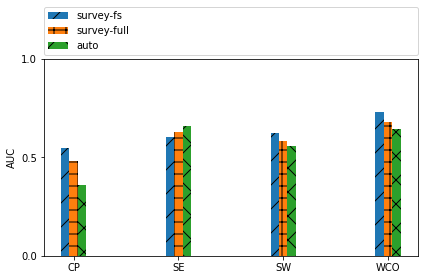

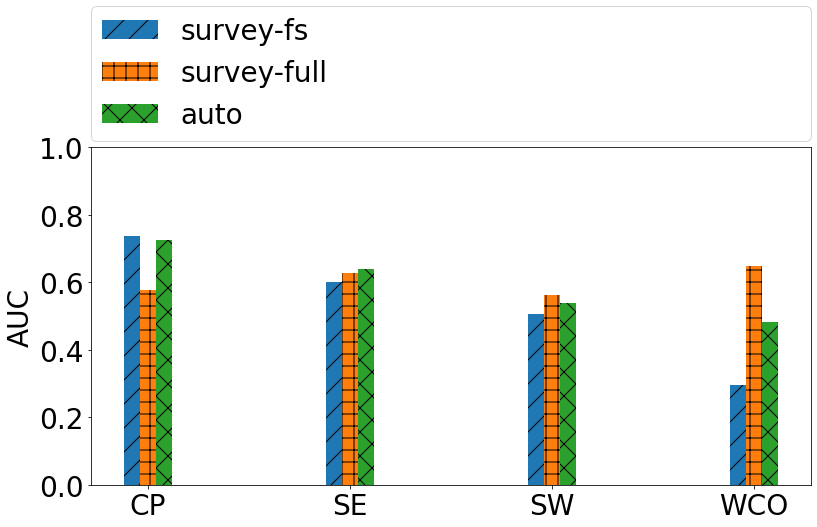

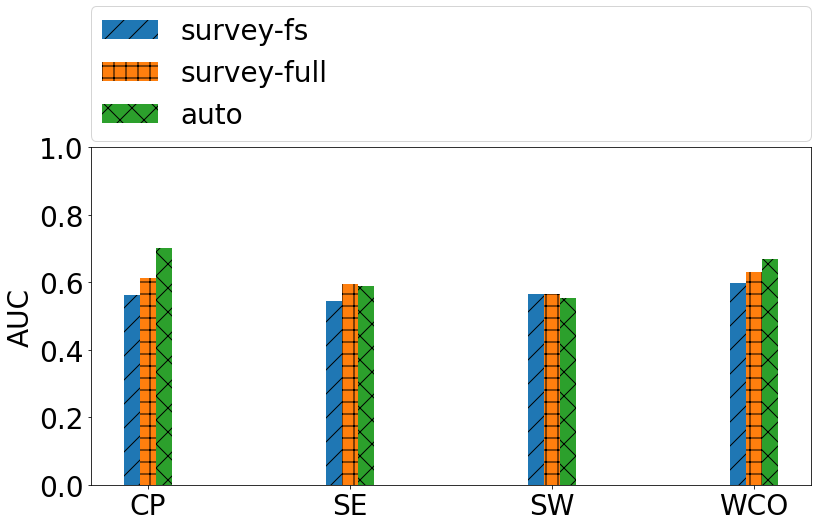

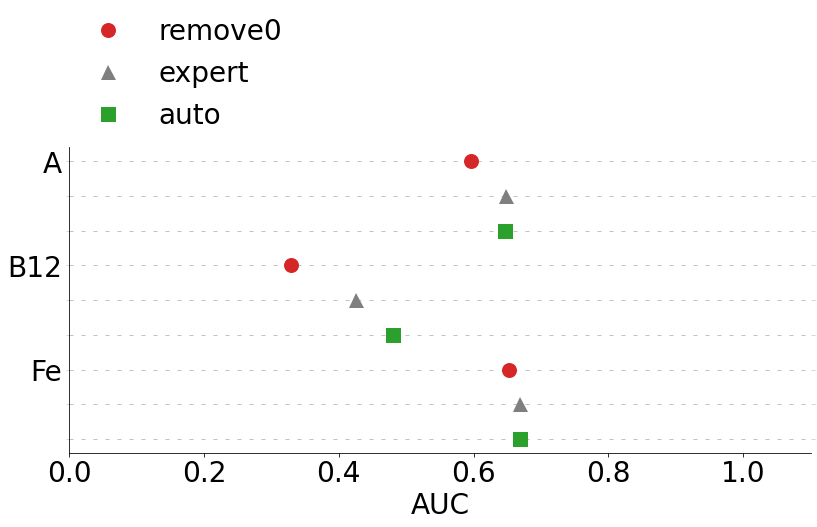

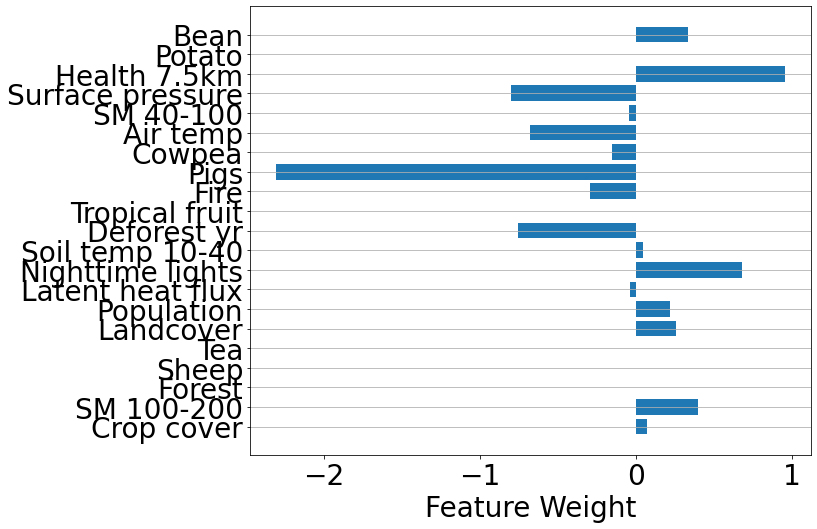

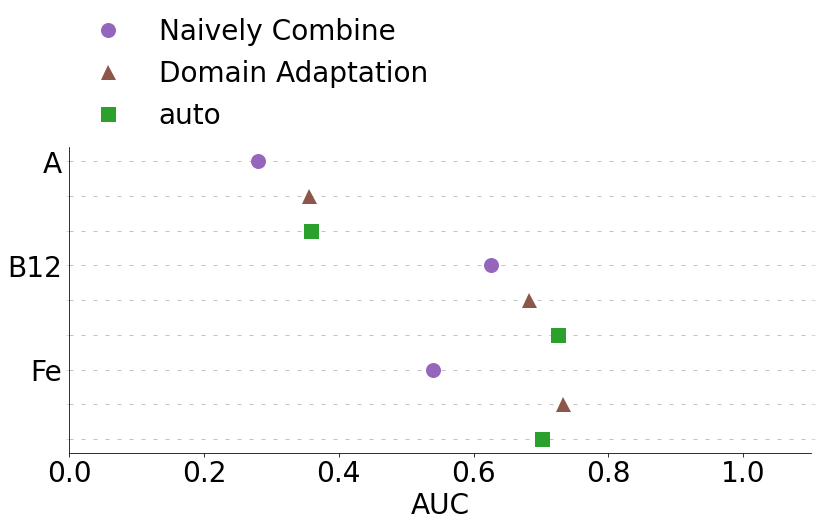

In [8]:
# Run training
exp_utils_clean.run_and_plot(csvs, 
                             csvs_metadata, 
                             [-2,-2,-2,-2,-2], 
                             [('consecutive',-2),
                              ('consecutive',-2),
                              ('consecutive',-2),
                              ('consecutive',-2),
                              ('consecutive',-2)], 
                             ['AUC', 'Weights'], 
                             da_method='auto', 
                             features=explained_center_features, 
                             where_weights=[1], 
                             method_weights=0, 
                             fontsize_weights=28)